In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Selecting relevant columns and filtering the data for a specific season
season = "2008-2009"
# Read the data from the CSV file
data = pd.read_csv("stats.csv")
data


,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


In [3]:
selected_columns = ["team", "wins", "losses", "goals"]
season_data = data[data["season"] == season][selected_columns]

# Filling missing values with zeros
season_data.fillna(0, inplace=True)

# Creating vectors for each team
team_vectors = {
    row["team"]: np.array([row["wins"], row["losses"], row["goals"]])
    for index, row in season_data.iterrows()
}

In [4]:
# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return (
        dot_product / (norm_vec1 * norm_vec2)
        if norm_vec1 != 0 and norm_vec2 != 0
        else 0
    )


In [5]:
# Calculating cosine similarities
similarities = {}
for team1, vec1 in team_vectors.items():
    for team2, vec2 in team_vectors.items():
        if team1 != team2:
            pair = tuple(sorted([team1, team2]))
            if pair not in similarities:  # Avoiding duplicate calculations
                similarities[pair] = cosine_similarity(vec1, vec2)

In [6]:
# Identifying the team with the most wins
most_wins_team = max(team_vectors, key=lambda x: team_vectors[x][0])

# Sorting teams by similarity to the team with the most wins
sorted_teams = sorted(similarities.keys(), key=lambda x: similarities[x], reverse=True)
top_10_similar_teams = [pair for pair in sorted_teams if most_wins_team in pair][:10]



In [7]:
# Display the top 10 most similar teams
print(f"Top 10 teams most similar in terms of wins, losses, and goals to {most_wins_team} in the {season} season:")
for i, teams in enumerate(top_10_similar_teams, start=1):
    other_team = [team for team in teams if team != most_wins_team][0]
    print(f"{i}. {other_team} (Similarity: {similarities[teams]:.2f})")

Top 10 teams most similar in terms of wins, losses, and goals to Manchester United in the 2008-2009 season:
1. Chelsea (Similarity: 1.00)
2. Liverpool (Similarity: 1.00)
3. Arsenal (Similarity: 0.99)
4. Everton (Similarity: 0.99)
5. Aston Villa (Similarity: 0.99)
6. Fulham (Similarity: 0.97)
7. Tottenham Hotspur (Similarity: 0.96)
8. Manchester City (Similarity: 0.96)
9. West Ham United (Similarity: 0.96)
10. Stoke City (Similarity: 0.94)


## Data Visualization 1

/var/folders/fq/jm54xgcx1bs5_qxn85_twlzh0000gr/T/ipykernel_57970/4063934078.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Similarity", y="Team", data=teams_similarity, palette="Blues_d")


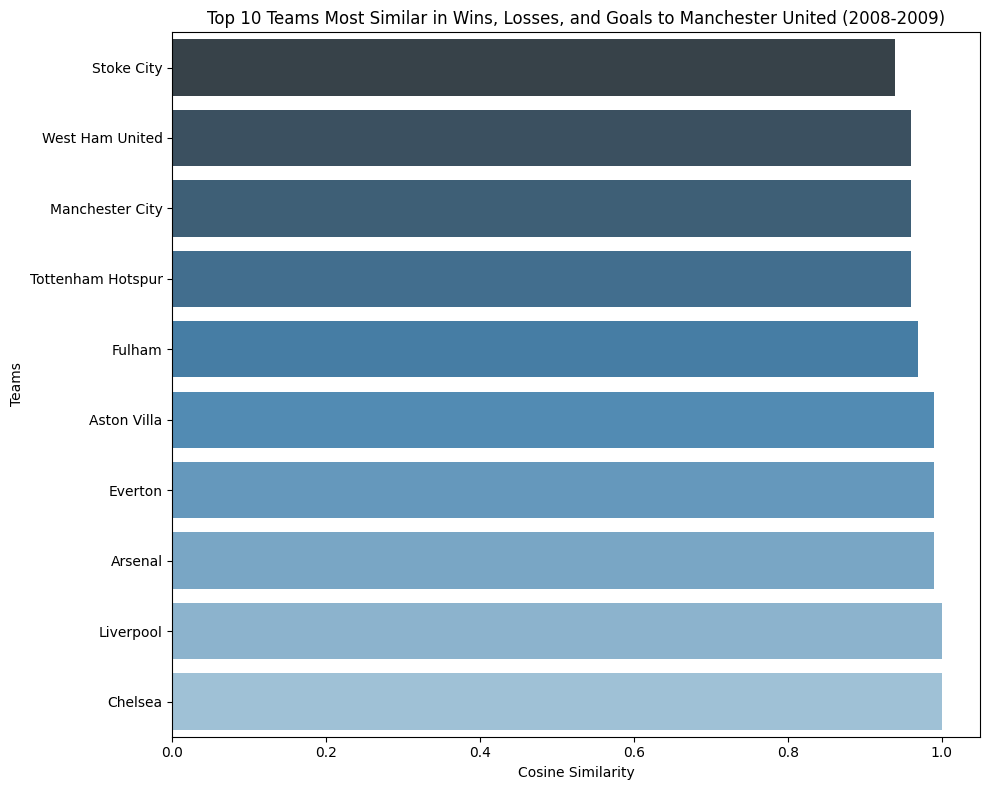

In [20]:
# Manually creating a DataFrame for the provided similarity data
teams_similarity = pd.DataFrame(
    {
        "Team": [
            "Chelsea",
            "Liverpool",
            "Arsenal",
            "Everton",
            "Aston Villa",
            "Fulham",
            "Tottenham Hotspur",
            "Manchester City",
            "West Ham United",
            "Stoke City",
        ],
        "Similarity": [1.00, 1.00, 0.99, 0.99, 0.99, 0.97, 0.96, 0.96, 0.96, 0.94],
    }
)

# Creating a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="Similarity", y="Team", data=teams_similarity, palette="Blues_d")
plt.title(
    "Top 10 Teams Most Similar in Wins, Losses, and Goals to Manchester United (2008-2009)"
)
plt.xlabel("Cosine Similarity")
plt.ylabel("Teams")
plt.gca().invert_yaxis()  # Highest similarity at the top
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

In [13]:
from scipy.spatial.distance import euclidean

# Identifying the team with the most losses in the 2008-2009 season
most_losses_team = season_data.loc[season_data["losses"].idxmax(), "team"]

# Creating vectors for each team based on losses
team_loss_vectors = {
    row["team"]: np.array([row["losses"]]) for index, row in season_data.iterrows()
}


# Function to calculate Euclidean distance
def euclidean_distance(vec1, vec2):
    return euclidean(vec1, vec2)


# Calculating Euclidean distances based on losses
loss_distances = {}
for team1, vec1 in team_loss_vectors.items():
    for team2, vec2 in team_loss_vectors.items():
        if team1 != team2:
            pair = tuple(sorted([team1, team2]))
            if pair not in loss_distances:  # Avoiding duplicate calculations
                loss_distances[pair] = euclidean_distance(vec1, vec2)

# Sorting teams by distance to the team with the most losses (lower distance means more similar)
sorted_loss_teams = sorted(loss_distances.keys(), key=lambda x: loss_distances[x])
top_10_loss_similar_teams = [
    pair for pair in sorted_loss_teams if most_losses_team in pair
][:10]

# Display the top 10 most similar teams in terms of losses
print(
    f"Top 10 teams most similar in terms of losses to {most_losses_team} in the {season} season:"
)
for i, teams in enumerate(top_10_loss_similar_teams, start=1):
    other_team = [team for team in teams if team != most_losses_team][0]
    print(f"{i}. {other_team} (Distance: {loss_distances[teams]:.2f})")

Top 10 teams most similar in terms of losses to West Bromwich Albion in the 2008-2009 season:
1. Sunderland (Distance: 2.00)
2. Middlesbrough (Distance: 2.00)
3. Bolton Wanderers (Distance: 3.00)
4. Hull City (Distance: 3.00)
5. Manchester City (Distance: 4.00)
6. Newcastle United (Distance: 4.00)
7. Stoke City (Distance: 5.00)
8. Wigan Athletic (Distance: 5.00)
9. Blackburn Rovers (Distance: 5.00)
10. Portsmouth (Distance: 5.00)


## Data Visualization 2

/var/folders/fq/jm54xgcx1bs5_qxn85_twlzh0000gr/T/ipykernel_57970/3457602805.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distances, y=teams, palette="coolwarm")


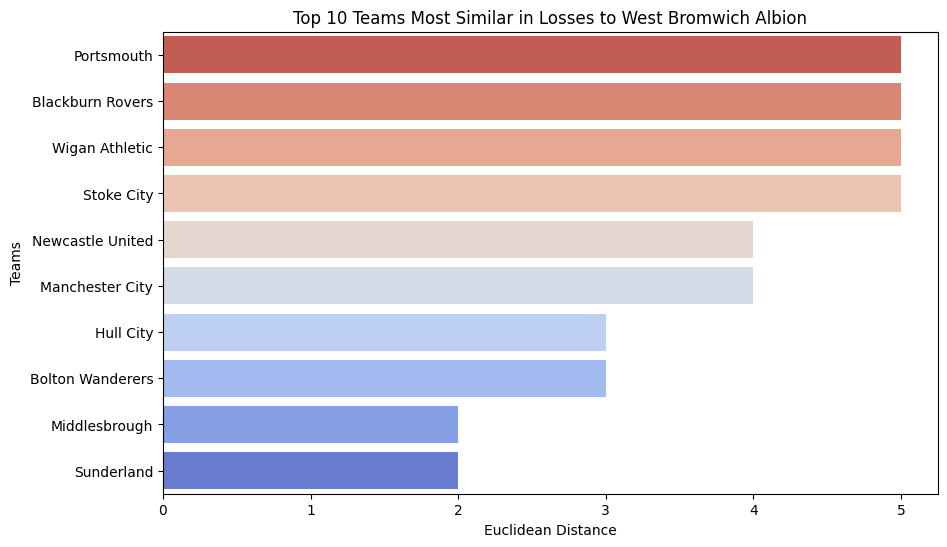

In [16]:
# Extracting the team names and distances for the plot
teams = [
    pair[0] if pair[0] != most_losses_team else pair[1]
    for pair in top_10_loss_similar_teams
]
distances = [loss_distances[pair] for pair in top_10_loss_similar_teams]

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=distances, y=teams, palette="coolwarm")
plt.title(f"Top 10 Teams Most Similar in Losses to {most_losses_team}")
plt.xlabel("Euclidean Distance")
plt.ylabel("Teams")
plt.gca().invert_yaxis()  # Closest team at the top
plt.show()

In [14]:
# Filtering the data for the 2008-2009 season since we're continuing with the same dataset and season
season_touches_data = data[data["season"] == "2008-2009"]

# Identifying the team with the highest number of touches in the 2008-2009 season
most_touches_team = season_touches_data.loc[
    season_touches_data["touches"].idxmax(), "team"
]

# Creating vectors for each team based on touches
team_touches_vectors = {
    row["team"]: np.array([row["touches"]])
    for index, row in season_touches_data.iterrows()
}

# Calculating Euclidean distances based on touches
touches_distances = {}
for team1, vec1 in team_touches_vectors.items():
    for team2, vec2 in team_touches_vectors.items():
        if team1 != team2:
            pair = tuple(sorted([team1, team2]))
            if pair not in touches_distances:  # Avoiding duplicate calculations
                touches_distances[pair] = euclidean_distance(vec1, vec2)

# Sorting teams by distance to the team with the highest touches (lower distance means more similar)
sorted_touches_teams = sorted(
    touches_distances.keys(), key=lambda x: touches_distances[x]
)
top_10_touches_similar_teams = [
    pair for pair in sorted_touches_teams if most_touches_team in pair
][:10]

# Display the top 10 most similar teams in terms of touches
print(
    f"Top 10 teams most similar in terms of touches to {most_touches_team} in the {season} season:"
)
for i, teams in enumerate(top_10_touches_similar_teams, start=1):
    other_team = [team for team in teams if team != most_touches_team][0]
    print(f"{i}. {other_team} (Distance: {touches_distances[teams]:.2f})")

Top 10 teams most similar in terms of touches to Manchester United in the 2008-2009 season:
1. Chelsea (Distance: 115.00)
2. Arsenal (Distance: 200.00)
3. Liverpool (Distance: 202.00)
4. Tottenham Hotspur (Distance: 3501.00)
5. Fulham (Distance: 3771.00)
6. Manchester City (Distance: 3957.00)
7. West Ham United (Distance: 4415.00)
8. Portsmouth (Distance: 4663.00)
9. Everton (Distance: 4872.00)
10. West Bromwich Albion (Distance: 5173.00)


## Data Visualization 3

/var/folders/fq/jm54xgcx1bs5_qxn85_twlzh0000gr/T/ipykernel_57970/1570724047.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distances, y=teams, palette="coolwarm")


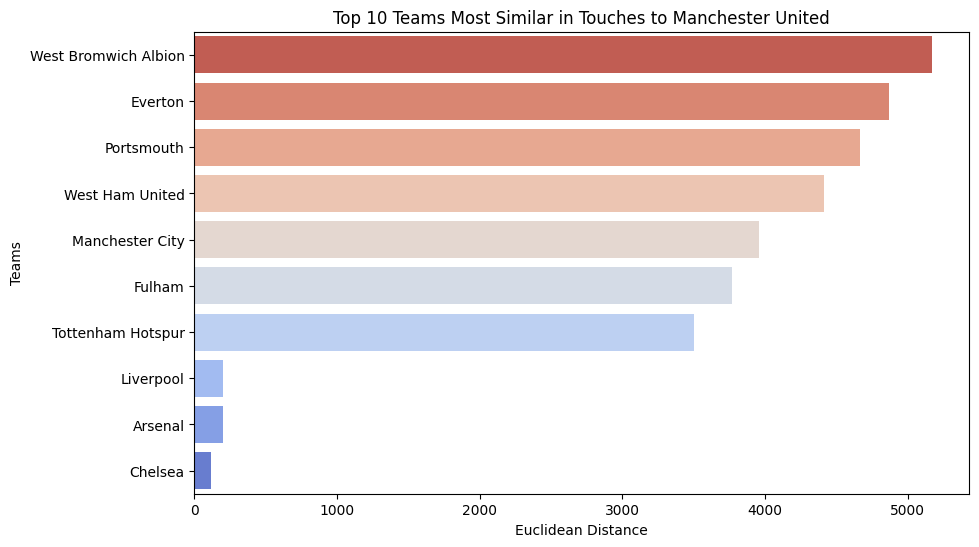

In [15]:
# Extract the team names (excluding Manchester United) and their distances for plotting
teams = [
    pair[0] if pair[0] != most_touches_team else pair[1]
    for pair in top_10_touches_similar_teams
]
distances = [touches_distances[pair] for pair in top_10_touches_similar_teams]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=distances, y=teams, palette="coolwarm")
plt.title(f"Top 10 Teams Most Similar in Touches to {most_touches_team}")
plt.xlabel("Euclidean Distance")
plt.ylabel("Teams")
plt.gca().invert_yaxis()  # Closest team at the top
plt.show()